In [1]:
import kagglehub
import os

# Download dataset
path = kagglehub.dataset_download("masoudnickparvar/brain-tumor-mri-dataset")

# Print path to verify where it is saved
print("Dataset Path:", path)

# List files in the dataset directory
os.listdir(path)


100%|██████████| 149M/149M [00:01<00:00, 105MB/s]

Extracting files...


Dataset Path: /root/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1


['Testing', 'Training']

In [2]:
import pandas as pd
import numpy as np
import keras
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten # type: ignore
from sklearn.metrics import accuracy_score
from PIL import Image
import ipywidgets as widgets
import io
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import os
import cv2
import numpy as np

# Define dataset path (Update this if needed)
dataset_path = "/root/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1"

X_train = []
Y_train = []
image_size = 150
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

# ✅ Load Training Data
for i in labels:
    folderPath = os.path.join(dataset_path, "Training", i)  # ✅ Correct path
    if not os.path.exists(folderPath):
        print(f"Warning: Folder not found - {folderPath}")
        continue  # Skip if folder does not exist

    for j in os.listdir(folderPath):
        img_path = os.path.join(folderPath, j)
        img = cv2.imread(img_path)
        if img is None:
            print(f"Warning: Could not read image {img_path}")
            continue  # Skip unreadable images

        img = cv2.resize(img, (image_size, image_size))
        X_train.append(img)
        Y_train.append(i)

# ✅ Load Testing Data
for i in labels:
    folderPath = os.path.join(dataset_path, "Testing", i)  # ✅ Correct path
    if not os.path.exists(folderPath):
        print(f"Warning: Folder not found - {folderPath}")
        continue  # Skip if folder does not exist

    for j in os.listdir(folderPath):
        img_path = os.path.join(folderPath, j)
        img = cv2.imread(img_path)
        if img is None:
            print(f"Warning: Could not read image {img_path}")
            continue  # Skip unreadable images

        img = cv2.resize(img, (image_size, image_size))
        X_train.append(img)
        Y_train.append(i)

# ✅ Convert to NumPy arrays
X_train = np.array(X_train)
Y_train = np.array(Y_train)

print(f"X_train shape: {X_train.shape}")
print(f"Y_train shape: {Y_train.shape}")


X_train shape: (7023, 150, 150, 3)
Y_train shape: (7023,)


In [5]:
X_train, Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

#output will be like
# total img, size of img, size of ing, RGB value

(7023, 150, 150, 3)

now split the data into train test


In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.1, random_state=101)


In [7]:
# Convert labels to indices
y_train = np.array([labels.index(i) for i in Y_train])
y_test = np.array([labels.index(i) for i in Y_test])

y_train = tf.keras.utils.to_categorical(y_train, num_classes=len(labels))
y_test = tf.keras.utils.to_categorical(y_test, num_classes=len(labels))
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")



X_train shape: (6320, 150, 150, 3), X_test shape: (703, 150, 150, 3)
y_train shape: (6320, 4), y_test shape: (703, 4)


In [8]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation = 'relu',input_shape = (150,150,3)))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(Conv2D(256,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation= 'relu'))
model.add(Dense(512,activation= 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 146, 146, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 73, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 73, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 71, 71, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 69, 69, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 69, 69, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 34, 34, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 34, 34, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 30, 30, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 10, 10, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,277,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,447,044 (16.96 MB)

 Trainable params: 4,447,044 (16.96 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
import tensorflow as tf

model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),  # Explicit optimizer
    metrics=['accuracy']  # Use a list instead of a tuple
)


In [11]:
history = model.fit(X_train,y_train,epochs=150,validation_split=0.1)

Epoch 1/150
178/178 ━━━━━━━━━━━━━━━━━━━━ 45s 155ms/step - accuracy: 0.3227 - loss: 2.5656 - val_accuracy: 0.4699 - val_loss: 1.2146
Epoch 2/150
178/178 ━━━━━━━━━━━━━━━━━━━━ 53s 71ms/step - accuracy: 0.6452 - loss: 0.8081 - val_accuracy: 0.5285 - val_loss: 1.0673
Epoch 3/150
178/178 ━━━━━━━━━━━━━━━━━━━━ 13s 71ms/step - accuracy: 0.7423 - loss: 0.6299 - val_accuracy: 0.5063 - val_loss: 1.0596
Epoch 4/150
178/178 ━━━━━━━━━━━━━━━━━━━━ 13s 71ms/step - accuracy: 0.8377 - loss: 0.4208 - val_accuracy: 0.6377 - val_loss: 0.8169
Epoch 5/150
178/178 ━━━━━━━━━━━━━━━━━━━━ 21s 73ms/step - accuracy: 0.8560 - loss: 0.3844 - val_accuracy: 0.6614 - val_loss: 0.7845
Epoch 6/150
178/178 ━━━━━━━━━━━━━━━━━━━━ 13s 73ms/step - accuracy: 0.8803 - loss: 0.3185 - val_accuracy: 0.7943 - val_loss: 0.5305
Epoch 7/150
178/178 ━━━━━━━━━━━━━━━━━━━━ 21s 74ms/step - accuracy: 0.8918 - loss: 0.2852 - val_accuracy: 0.8434 - val_loss: 0.3897
Epoch 8/150
178/178 ━━━━━━━━━━━━━━━━━━━━ 20s 73ms/step - accuracy: 0.8900 - loss: 

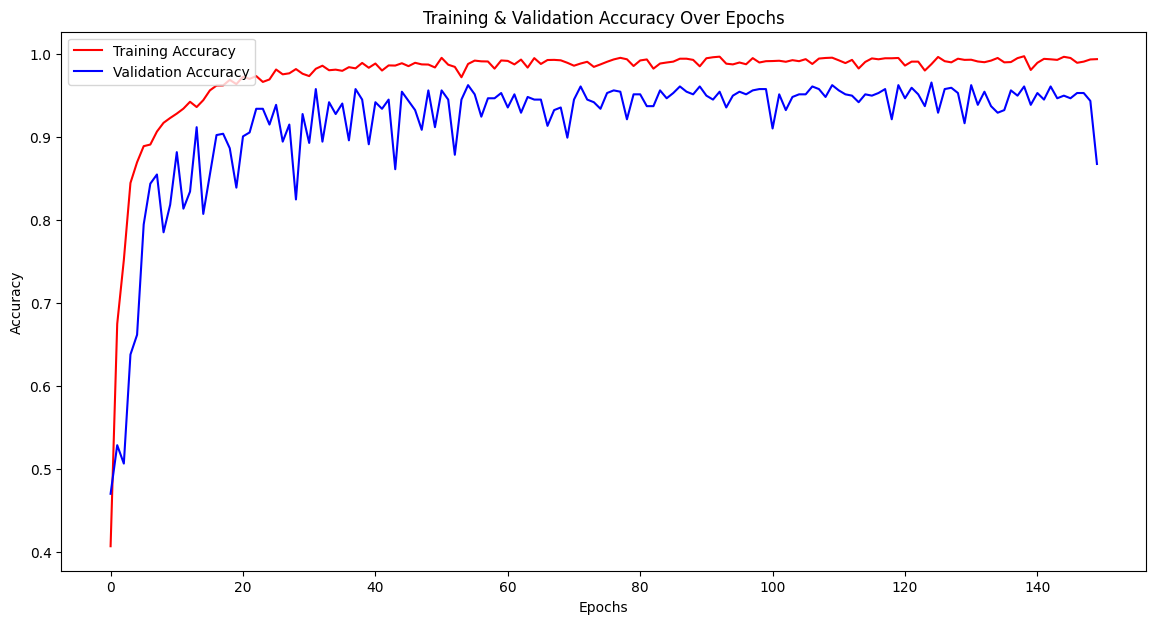

In [12]:
model.save('brain_tumor_test.h5')
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']  # ✅ Corrected key

# Define epochs correctly
epochs = range(len(acc))

# Plot training and validation accuracy
fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")  # ✅ Fixed validation accuracy
plt.legend(loc='upper left')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training & Validation Accuracy Over Epochs")
plt.show()

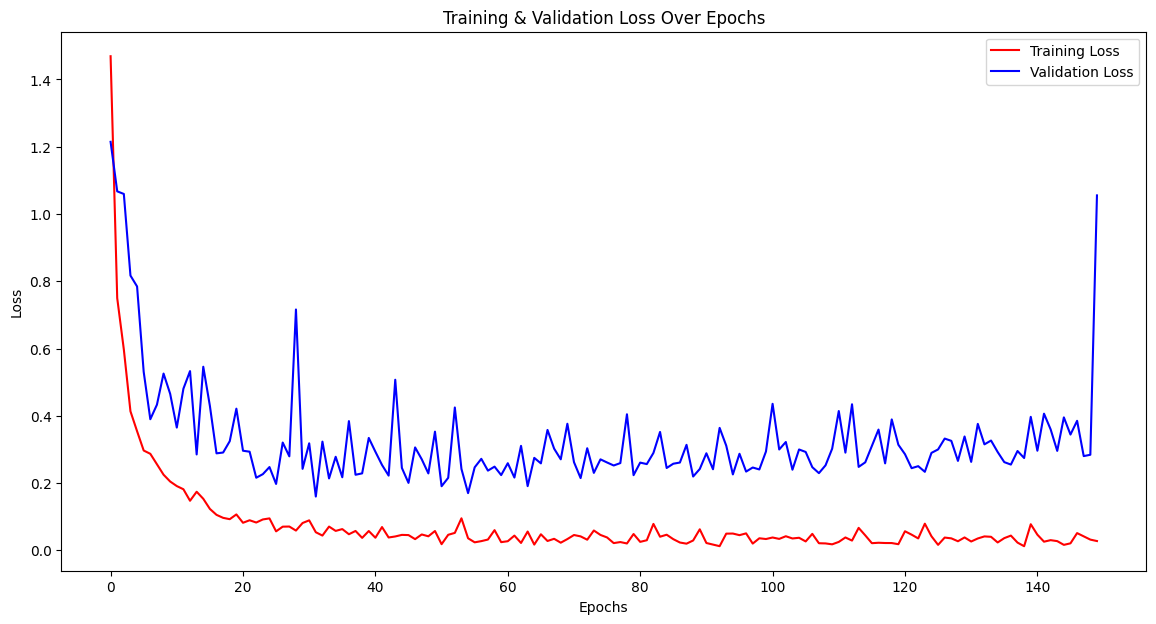

In [13]:
# Extract loss values
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(train_loss))

# Plot training & validation loss
plt.figure(figsize=(14,7))
plt.plot(epochs, train_loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Validation Loss Over Epochs")
plt.legend(loc='upper right')
plt.show()

Prediction

In [ ]:

import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
# Load the trained model
model = load_model('brain_tumor_test.h5')

# Define class labels
labels = ['glioma tumor', 'meningioma tumor', 'notumor tumor', 'pituitary tumor']

# Load and preprocess the image
img_path = 'F:\SOLUTION_O7\BRAIN_TUMAR_CNN\Training\meningioma\Tr-me_1336.jpg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
img = cv2.resize(img, (150, 150))  # Resize to match model input size
img_array = np.array(img) / 255.0  # Normalize pixel values
img_array = img_array.reshape(1, 150, 150, 3)  # Reshape for model input

# Display the image
plt.imshow(img)
plt.axis("off")
plt.title("Input Image")
plt.show()

# Make prediction
predictions = model.predict(img_array)
predicted_index = np.argmax(predictions)  # Get index of highest probability class
predicted_class = labels[predicted_index]  # Map index to class label

# Print the prediction
print(f"Predicted Tumor Type: {predicted_class}")